In [1]:
%config InlineBackend.figure_formats = ['svg']
import xyzpy as xyz
import quimb as qu
import quimb.tensor as qtn
from quimb.experimental.operatorbuilder import *

In [2]:
H = SparseOperatorBuilder()
H += 1.0, ('+', 0), ('-', 1)
H += 1.0, ('+', 1), ('-', 0)
H.jordan_wigner_transform()
H.show()

SparseOperatorBuilder(nsites=2, nterms=2, locality=2))
+ -  +1.0
- +  +1.0


In [3]:
Lx = 4
Ly = 3
N = Lx * Ly
num_up = 6
num_down = 6
subspace = ((N, num_up), (N, num_down))

edges = qtn.edges_2d_square(Lx, Ly)
H = fermi_hubbard_from_edges(edges, t=1.0, U=2.0)
H.show()

SparseOperatorBuilder(nsites=24, nterms=80, locality=4))
+ - . . . . . . . . . . . . . . . . . . . . . .  -1.0
- + . . . . . . . . . . . . . . . . . . . . . .  -1.0
. . . . . . . . . . . . + - . . . . . . . . . .  -1.0
. . . . . . . . . . . . - + . . . . . . . . . .  -1.0
+ z z - . . . . . . . . . . . . . . . . . . . .  -1.0
- z z + . . . . . . . . . . . . . . . . . . . .  -1.0
. . . . . . . . . . . . + z z - . . . . . . . .  -1.0
. . . . . . . . . . . . - z z + . . . . . . . .  -1.0
. + - . . . . . . . . . . . . . . . . . . . . .  -1.0
. - + . . . . . . . . . . . . . . . . . . . . .  -1.0
. . . . . . . . . . . . . + - . . . . . . . . .  -1.0
. . . . . . . . . . . . . - + . . . . . . . . .  -1.0
. + z z - . . . . . . . . . . . . . . . . . . .  -1.0
. - z z + . . . . . . . . . . . . . . . . . . .  -1.0
. . . . . . . . . . . . . + z z - . . . . . . .  -1.0
. . . . . . . . . . . . . - z z + . . . . . . .  -1.0
. . + z z - . . . . . . . . . . . . . . . . . .  -1.0
. . - z z + . . . . . . .

In [4]:
sH = H.build_sparse_matrix(*subspace, parallel=True)
sH

TypeError: Cannot interpret '12' as a data type

In [5]:
qu.groundenergy(sH)

np.float64(-11.48187571377616)

In [6]:
from quimb.gates import *

In [7]:
builder = SparseOperatorBuilder()
builder.add_term(3, ('z', 0), ('z', 2))
builder.add_term(2, ['z', 2])
builder.add_term(-1, ('z', 2), ('z', 1))
builder.terms

((3.0, (('z', 0), ('z', 2))),
 (2.0, (('z', 2),)),
 (np.float64(-1.0), (('z', 2), ('z', 1))))

In [8]:
H_MPO = builder.build_mpo()

In [9]:
builder._term_store

{(('z', 0), ('z', 2)): 3.0,
 (('z', 2),): 2.0,
 (('z', 2), ('z', 1)): np.float64(-1.0)}

In [10]:
builder.show(' ')

SparseOperatorBuilder(nsites=3, nterms=3, locality=2))
z   z  +3.0
    z  +2.0
  z z  -1.0


In [11]:
ex = 3 * (Z & I & Z) + 2 * (Z & I & I) - 1 * (Z & Z & I)
ex

[[ 4.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -2.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  6.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j -4.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  2.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -6.+0.j -0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -0.+0.j  0.+0.j]]

In [13]:
{
    k: {kk: dict(vv) for kk, vv in v.items()}
    for k, v in builder.build_coupling_map().items()
}

{0: {0: {0: (0, 3.0), 1: (1, -3.0)}, 2: {0: (0, 1.0), 1: (1, -1.0)}},
 1: {2: {0: (0, 2.0), 1: (1, -2.0)}},
 2: {2: {0: (0, -1.0), 1: (1, 1.0)}, 1: {0: (0, 1.0), 1: (1, -1.0)}}}

In [14]:
builder.config_coupling({0: 0, 1: 0, 2: 0})

([{0: np.int64(0), 1: np.int64(0), 2: np.int64(0)}], array([6.]))

In [14]:
ex - builder.build_dense()

/media/johnnie/Storage2TB/Sync/dev/python/quimb/quimb/experimental/operatorbuilder/operatorbuilder.py:1435: NumbaTypeSafetyWarning: unsafe cast from int64 to undefined. Precision may be lost.
  ci = bitmap[bi]


[[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -0.+0.j  0.+0.j]]

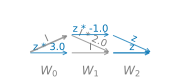

In [15]:
builder.draw_state_machine()

In [18]:
Lx = 4
Ly = 3
N = Lx * Ly
num_up = 6
num_down = 6
subspace = ((N, num_up), (N, num_down))

In [19]:
edges = qtn.edges_2d_square(Lx, Ly)
H = fermi_hubbard_from_edges(edges)
H.show('.')

SparseOperatorBuilder(nsites=24, nterms=80, locality=4))
+ - . . . . . . . . . . . . . . . . . . . . . .  -1.0
- + . . . . . . . . . . . . . . . . . . . . . .  -1.0
. . . . . . . . . . . . + - . . . . . . . . . .  -1.0
. . . . . . . . . . . . - + . . . . . . . . . .  -1.0
+ z z - . . . . . . . . . . . . . . . . . . . .  -1.0
- z z + . . . . . . . . . . . . . . . . . . . .  -1.0
. . . . . . . . . . . . + z z - . . . . . . . .  -1.0
. . . . . . . . . . . . - z z + . . . . . . . .  -1.0
. + - . . . . . . . . . . . . . . . . . . . . .  -1.0
. - + . . . . . . . . . . . . . . . . . . . . .  -1.0
. . . . . . . . . . . . . + - . . . . . . . . .  -1.0
. . . . . . . . . . . . . - + . . . . . . . . .  -1.0
. + z z - . . . . . . . . . . . . . . . . . . .  -1.0
. - z z + . . . . . . . . . . . . . . . . . . .  -1.0
. . . . . . . . . . . . . + z z - . . . . . . .  -1.0
. . . . . . . . . . . . . - z z + . . . . . . .  -1.0
. . + z z - . . . . . . . . . . . . . . . . . .  -1.0
. . - z z + . . . . . . .

In [20]:
H._term_store


old_term_store = H._term_store.copy()
H._term_store.clear()

for term, coeff in old_term_store.items():
    ops, site = zip(*term)
    if {'+', '-'}.intersection(ops):

        new_term = []
        for op, site in term:
            reg = H.site_to_reg(site)
            if op in {'+', '-'}:
                for r in range(reg):
                    new_term.append(('z', H.reg_to_site(r)))
            new_term.append((op, site))

        H.add_term(coeff, *new_term)
    else:
        H.add_term(coeff, *term)

In [21]:
H.show(' ')

SparseOperatorBuilder(nsites=24, nterms=80, locality=2))
+ -                                              -1.0
- +                                              +1.0
                        + -                      -1.0
                        - +                      +1.0
+     -                                          -1.0
-     +                                          +1.0
                        +     -                  -1.0
                        -     +                  +1.0
  + -                                            -1.0
  - +                                            +1.0
                          + -                    -1.0
                          - +                    +1.0
  +     -                                        -1.0
  -     +                                        +1.0
                          +     -                -1.0
                          -     +                +1.0
    +     -                                      -1.0
    -     +              

# build a sparse matrix to find groundstate of

In [22]:
%%time
S = H.build_sparse_matrix(*subspace, parallel=True)
S

CPU times: user 11.1 s, sys: 1.02 s, total: 12.1 s
Wall time: 3.11 s


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16686516 stored elements and shape (853776, 853776)>

In [23]:
%%time
ge, gs = qu.eigh(S, k=1, which='SA')
ge

CPU times: user 2min 48s, sys: 2.84 s, total: 2min 51s
Wall time: 24 s


array([-17.53174229])

# construct and find the expectation value of a different operator

In [24]:
hs = H.hilbert_space
hs.get_size(*subspace)

853776

In [25]:
C = SparseOperatorBuilder(
    terms=[
        (1.0, ('+', ('↑', (1, 1))), ('-', ('↑', (2, 1)))),
    ],
    # need to embed into larger Hilbert space of Hamiltonian
    hilbert_space=hs
)

# ensure fermionic
C.jordan_wigner_transform()

In [26]:
C.show()

SparseOperatorBuilder(nsites=24, nterms=1, locality=4))
. . . . + z z - . . . . . . . . . . . . . . . .  +1.0


In [27]:
# build sparse matrix
CS = C.build_sparse_matrix(*subspace, parallel=True)
CS

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 232848 stored elements and shape (853776, 853776)>

In [28]:
# find the groundstate expectation
qu.expec(CS, gs)

np.float64(-0.001535823796000976)

# VMC usage

For VMC we just need to compute coupling between computation basis
configurations (i.e. a single row of the sparse matrix).

In [29]:
config = hs.rand_config()
config

{('↑', (0, 0)): 0,
 ('↑', (0, 1)): 0,
 ('↑', (0, 2)): 0,
 ('↑', (1, 0)): 1,
 ('↑', (1, 1)): 1,
 ('↑', (1, 2)): 0,
 ('↑', (2, 0)): 1,
 ('↑', (2, 1)): 0,
 ('↑', (2, 2)): 0,
 ('↑', (3, 0)): 0,
 ('↑', (3, 1)): 1,
 ('↑', (3, 2)): 1,
 ('↓', (0, 0)): 1,
 ('↓', (0, 1)): 1,
 ('↓', (0, 2)): 0,
 ('↓', (1, 0)): 0,
 ('↓', (1, 1)): 1,
 ('↓', (1, 2)): 0,
 ('↓', (2, 0)): 0,
 ('↓', (2, 1)): 0,
 ('↓', (2, 2)): 1,
 ('↓', (3, 0)): 0,
 ('↓', (3, 1)): 0,
 ('↓', (3, 2)): 1}

In [30]:
configs, coeffs = H.config_coupling(config)

In [31]:
print(configs[:2], '...')
coeffs

[{('↑', (0, 0)): np.int64(1), ('↑', (0, 1)): np.int64(0), ('↑', (0, 2)): np.int64(0), ('↑', (1, 0)): np.int64(0), ('↑', (1, 1)): np.int64(1), ('↑', (1, 2)): np.int64(0), ('↑', (2, 0)): np.int64(1), ('↑', (2, 1)): np.int64(0), ('↑', (2, 2)): np.int64(0), ('↑', (3, 0)): np.int64(0), ('↑', (3, 1)): np.int64(1), ('↑', (3, 2)): np.int64(1), ('↓', (0, 0)): np.int64(1), ('↓', (0, 1)): np.int64(1), ('↓', (0, 2)): np.int64(0), ('↓', (1, 0)): np.int64(0), ('↓', (1, 1)): np.int64(1), ('↓', (1, 2)): np.int64(0), ('↓', (2, 0)): np.int64(0), ('↓', (2, 1)): np.int64(0), ('↓', (2, 2)): np.int64(1), ('↓', (3, 0)): np.int64(0), ('↓', (3, 1)): np.int64(0), ('↓', (3, 2)): np.int64(1)}, {('↑', (0, 0)): np.int64(0), ('↑', (0, 1)): np.int64(0), ('↑', (0, 2)): np.int64(0), ('↑', (1, 0)): np.int64(1), ('↑', (1, 1)): np.int64(1), ('↑', (1, 2)): np.int64(0), ('↑', (2, 0)): np.int64(1), ('↑', (2, 1)): np.int64(0), ('↑', (2, 2)): np.int64(0), ('↑', (3, 0)): np.int64(0), ('↑', (3, 1)): np.int64(1), ('↑', (3, 2)): n

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       2.])

# MPO building

Note you would want to more carefully order the hilbert space sites for non-1D and also
fermionic systems.

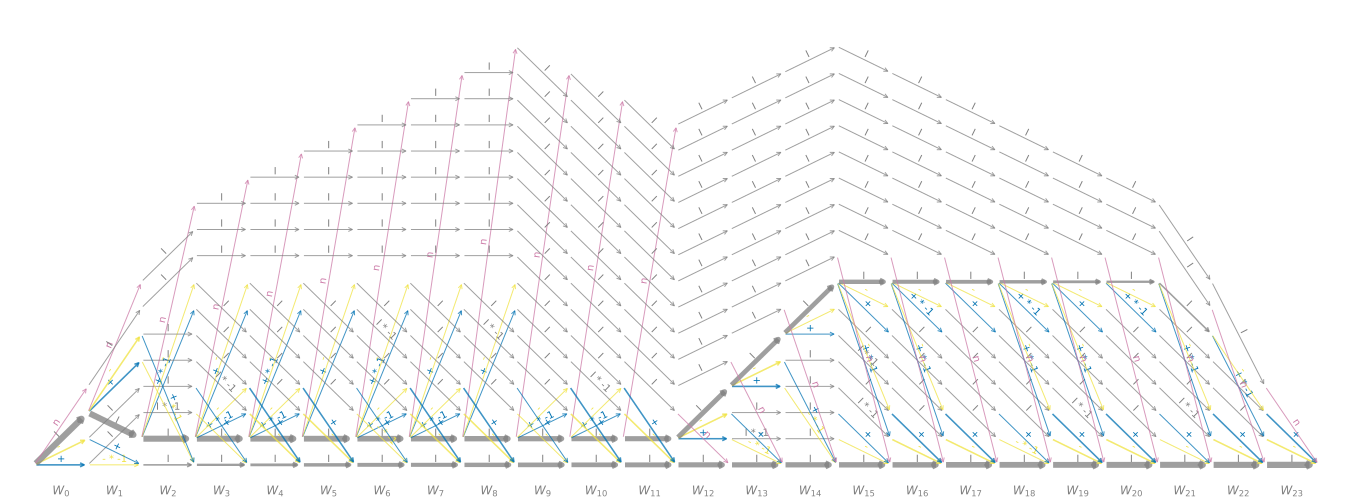

In [32]:
H.draw_state_machine()

In [33]:
mpo = H.build_mpo()
mpo.show()

│4│8│11│12│13│14│15│16│17│16│15│14│15│16│17│16│15│14│13│12│11│8│4│
●─●─●──●──●──●──●──●──●──●──●──●──●──●──●──●──●──●──●──●──●──●─●─●
│ │ │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │ │ │


In [34]:
mpo.compress()
mpo.show()

│4│8│11│12│13│14│15│16│17│16│15│14│15│16│17│16│15│14│13│12│11│8│4│
●─<─<──<──<──<──<──<──<──<──<──<──<──<──<──<──<──<──<──<──<──<─<─<
│ │ │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │ │ │


Althought the method is a simple greedy one, for semi-local hamiltonians like
here it can find the optimal solution (thus compressing hasn't changed
anything).